In [9]:
from collections import namedtuple
from functools import reduce
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pprint
from scipy import io
import wfdb
% matplotlib inline

In [2]:
f = None#h5py.File('data/training/tr03-0005', 'r')

In [3]:
# load the mat and hea files using their loader

record = wfdb.rdrecord('../data/training/tr03-0005/tr03-0005')

arousals = h5py.File('../data/training/tr03-0005/tr03-0005-arousal.mat', 'r')
arousal_ann = wfdb.rdann('../data/training/tr03-0005/tr03-0005', 'arousal')

In [10]:
#dir(arousal_ann)

In [11]:
arousal_ann.get_available_label_stores

<bound method Annotation.get_available_label_stores of <wfdb.io.annotation.Annotation object at 0x2b4abe42a9e8>>

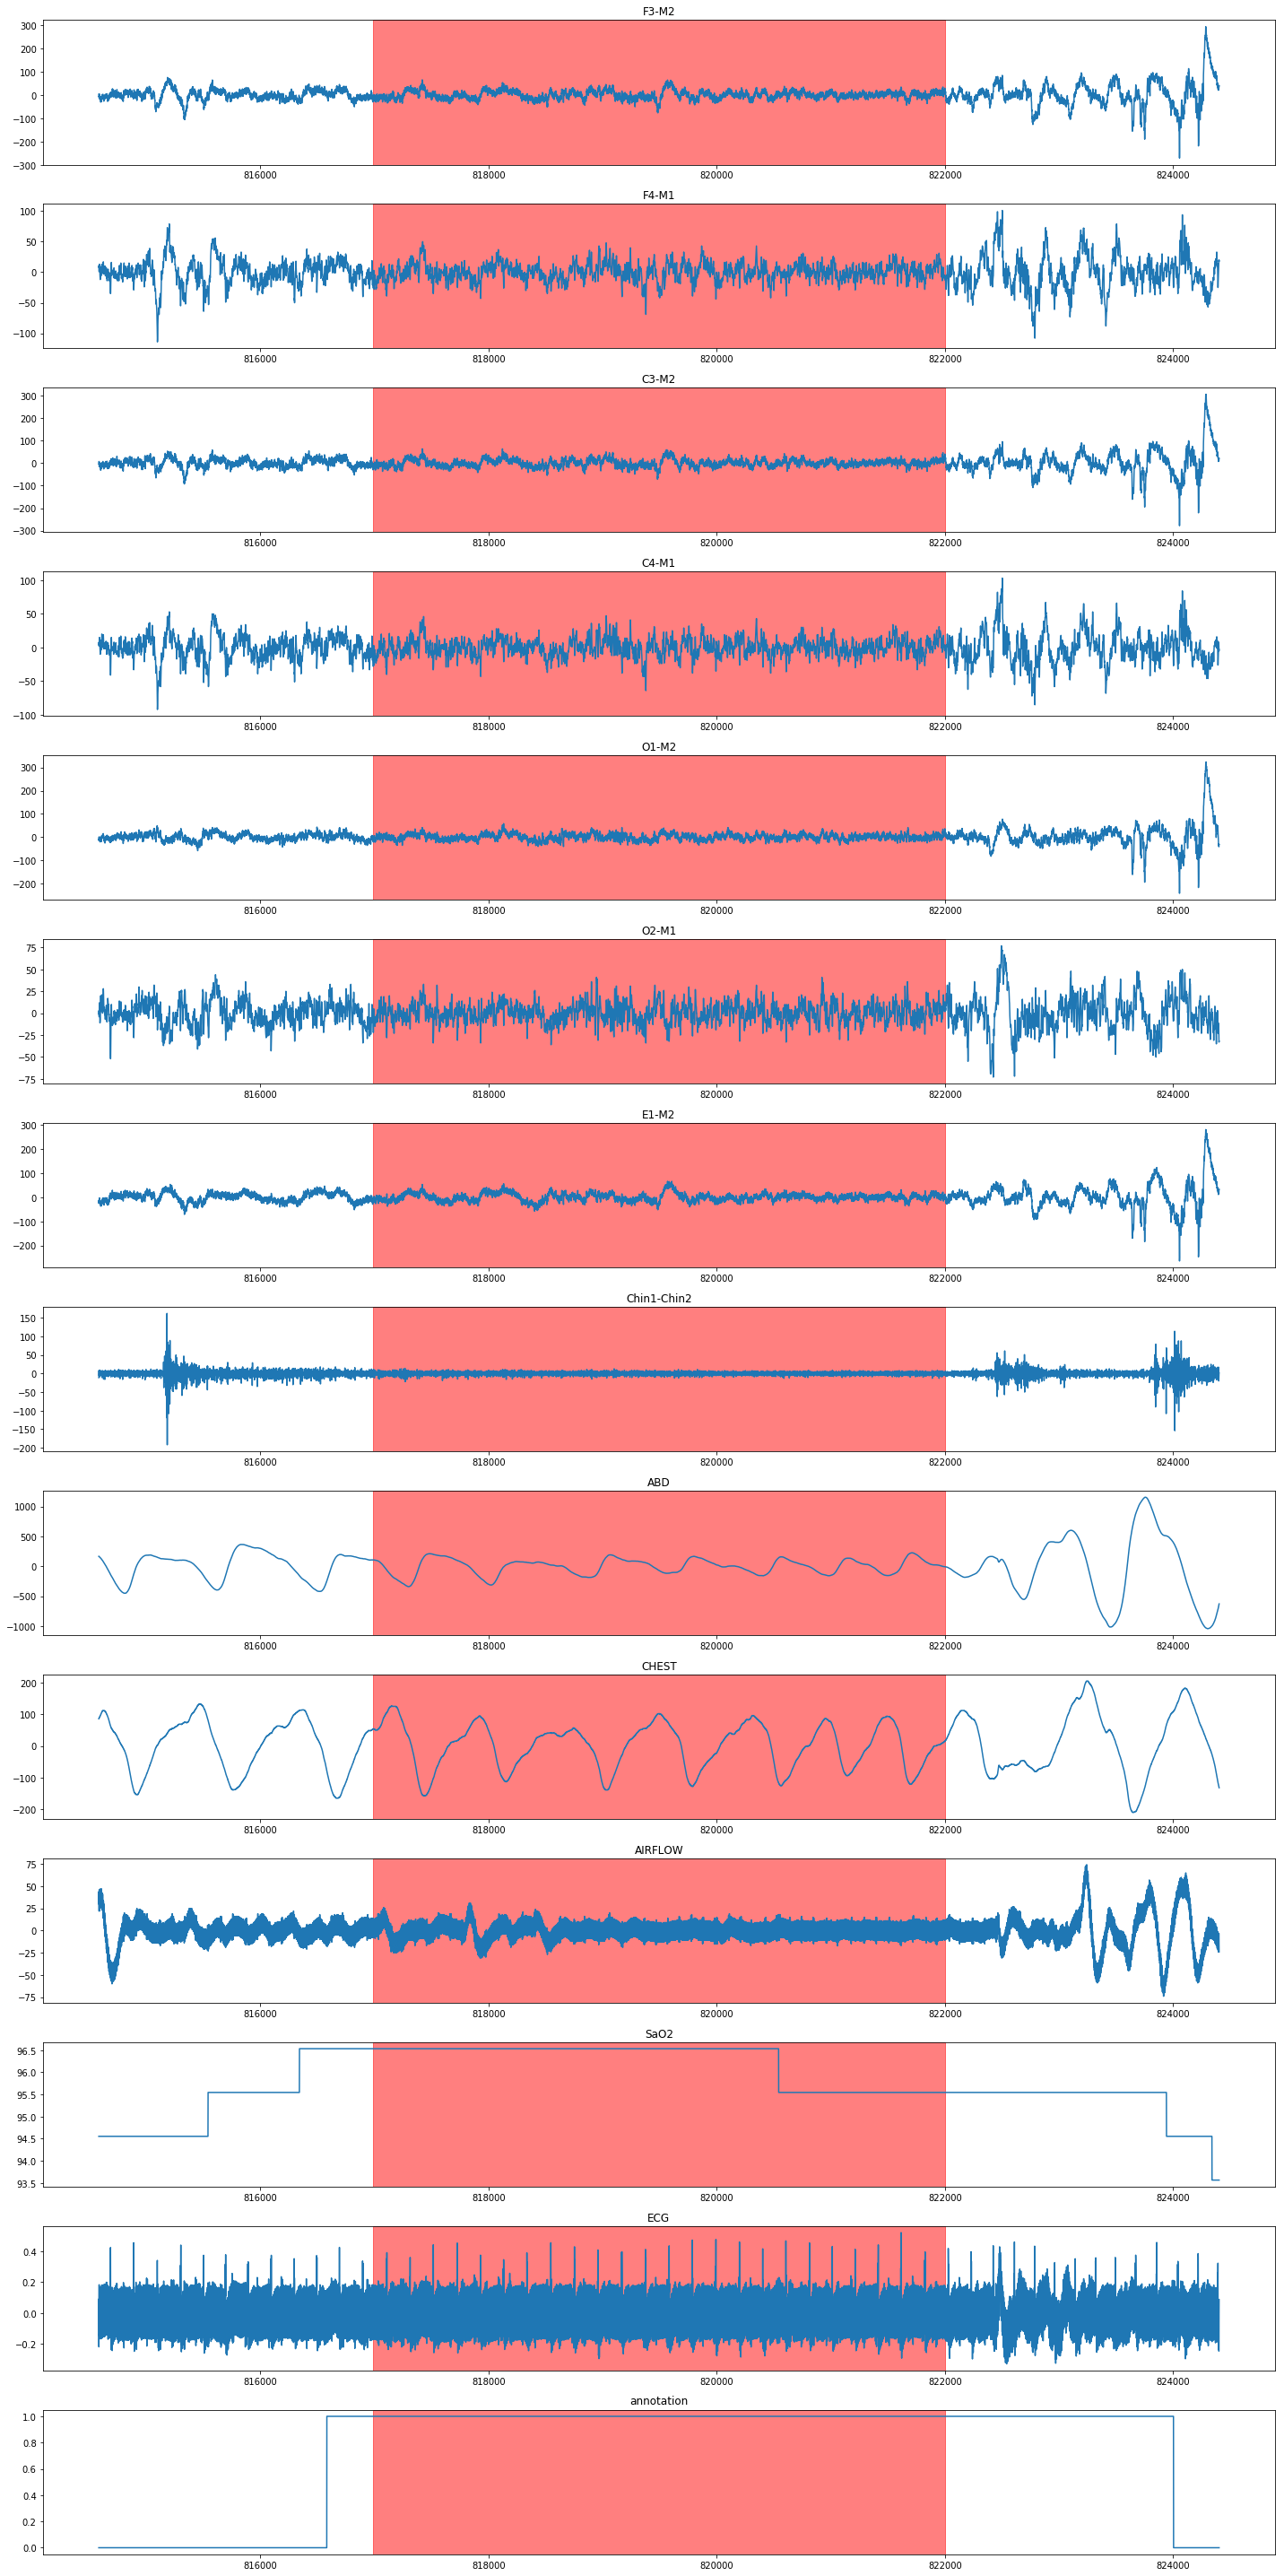

In [15]:
# record.p_signal[:,1:5:]
offset = 2400
start_idx = 816984 - offset
end_idx = 822004 + offset

x_ax = np.linspace(start_idx,end_idx, end_idx-start_idx)

f, axarr = plt.subplots(14, figsize=(20, 40))
for i in range(13):
    
    _ = axarr[i].plot(x_ax, record.p_signal[start_idx:end_idx,i], label=record.sig_name[i])
    _ = axarr[i].set_title(record.sig_name[i])
    _ = axarr[i].axvspan(start_idx + offset, end_idx - offset, color='red', alpha=0.5)
_ = axarr[13].plot(x_ax, arousals['data']['arousals'].value[start_idx:end_idx,].ravel(), label='annotation')
_ = axarr[13].set_title('annotation')
_ = axarr[13].axvspan(start_idx + offset, end_idx - offset, color='red', alpha=0.5)
plt.tight_layout()
plt.savefig('output_13channels_new.png')
plt.show()

In [14]:
arousals['data']['arousals'].value[start_idx:end_idx,].ravel()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

['nonrem1', 'nonrem2', 'nonrem3', 'rem', 'undefined', 'wake']
5147000


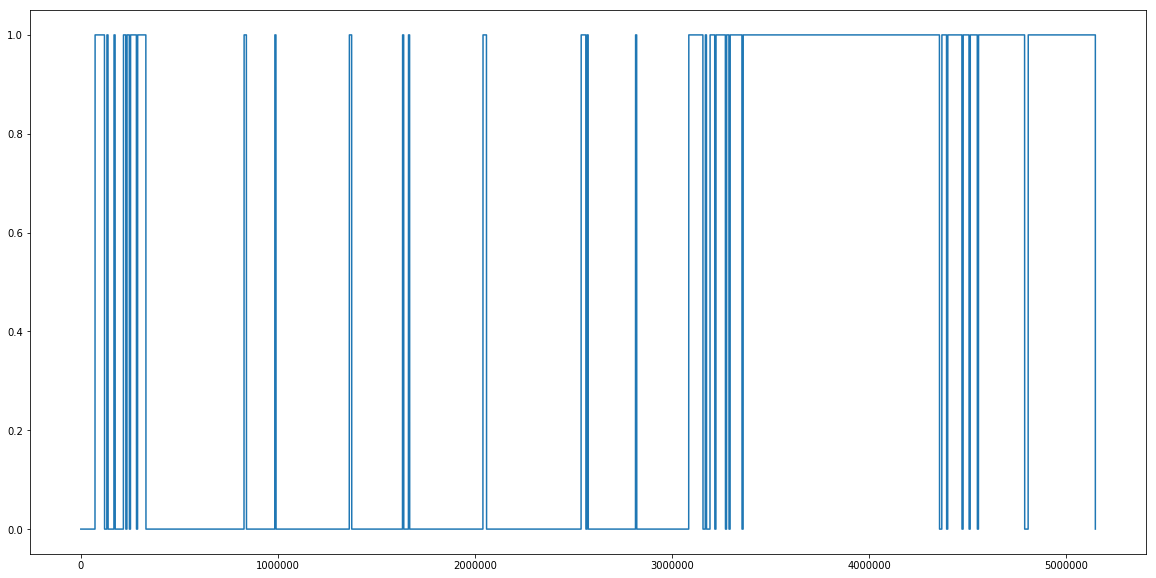

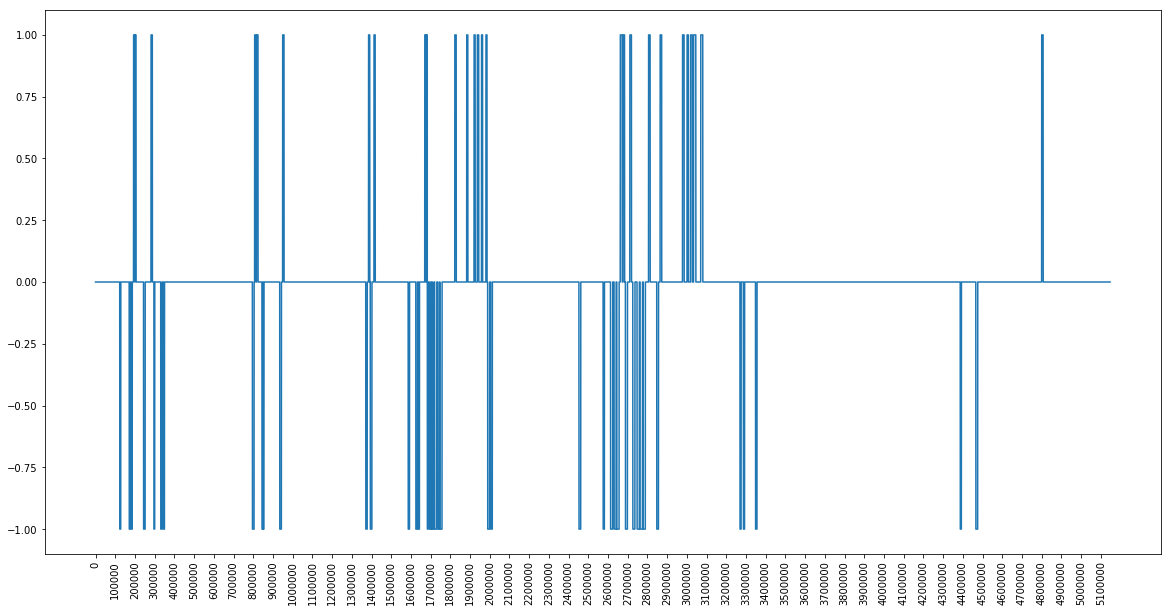

In [8]:
# list(arousals['data'].keys())
print(list(arousals['data']['sleep_stages']))
print(len(arousals['data']['sleep_stages']['wake'][0]))
_ = plt.figure(figsize=(20,10))
plt.plot(arousals['data']['sleep_stages']['wake'].value[0])

plt.show()


_ = plt.figure(figsize=(20,10))
plt.plot(arousals['data']['arousals'].value.ravel())
plt.xticks(np.arange(0, 5147001, 100000.0), rotation='vertical')
plt.show()

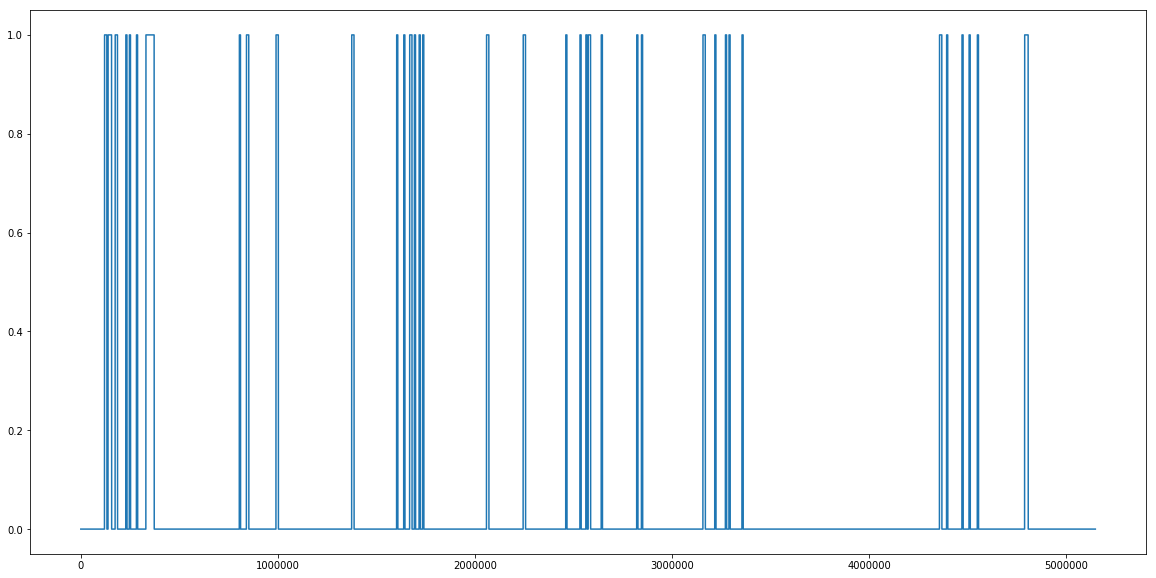

In [9]:
_ = plt.figure(figsize=(20,10))
plt.plot(arousals['data']['sleep_stages']['nonrem1'][0])
plt.show()

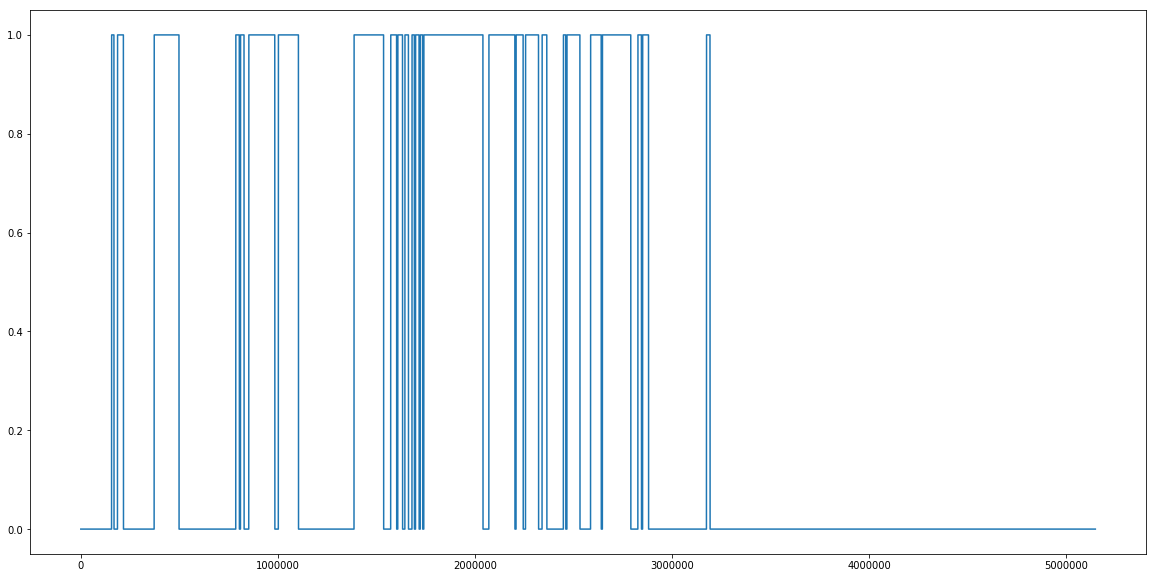

In [10]:
_ = plt.figure(figsize=(20,10))
plt.plot(arousals['data']['sleep_stages']['nonrem2'][0])
plt.show()

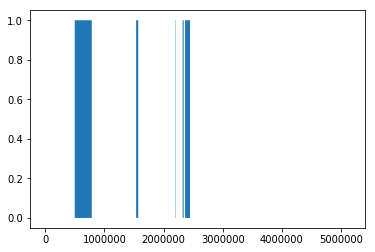

In [11]:
plt.fill(arousals['data']['sleep_stages']['nonrem3'][0])
plt.show()

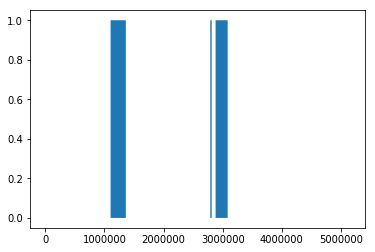

In [12]:
plt.fill(arousals['data']['sleep_stages']['rem'][0])
plt.show()

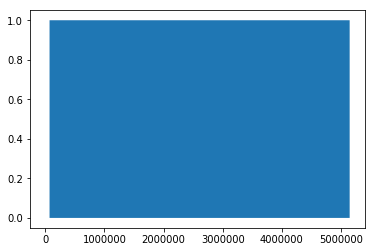

In [13]:
plt.fill(arousals['data']['sleep_stages']['undefined'][0])
plt.show()

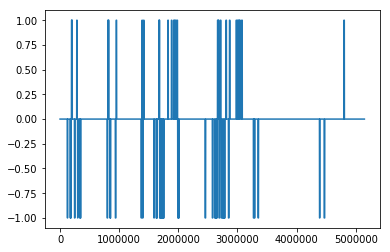

In [14]:
plt.plot(arousals['data']['arousals'])
plt.show()

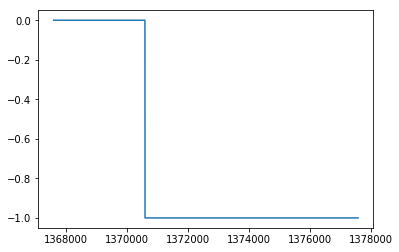

In [15]:
s = 1372584 - 5000
e = 1372584 + 5000


plt.plot(np.linspace(s,e, e-s), arousals['data']['arousals'][s:e,])
plt.show()

In [16]:
np.linspace(120000,132000, 12000)

array([ 120000.        ,  120001.00008334,  120002.00016668, ...,
        131997.99983332,  131998.99991666,  132000.        ])

In [17]:
for i in (arousal_ann.__dict__.keys()):
    print(i)
    print(arousal_ann.__dict__[i])

chan
[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0]
fs
200
sample
[  72000  120000  124524  127604  132000  138000  156000  168000  172524
  174000  176284  183186  186000  186006  192904  196364  199652  203231
  216000  228000  234000  245252  246000  251392  252000  281430  282000
  286010  288000  297954  299954  330000  332458  337538  345874  349494
  372000  498000  786000  797508  802048  804000  807108  810000  810868
  816984  822004  828000  840000  846021  849161  851704  852000  854204
  936176  940696  949180  954020  984000  990000 100200

In [18]:
for i in range(arousal_ann.ann_len - 1):
    print(arousal_ann.chan[i], arousal_ann.sample[i], arousal_ann.aux_note[i])


0 72000 W
0 120000 N1
1 124524 (resp_centralapnea
1 127604 resp_centralapnea)
0 132000 W
0 138000 N1
0 156000 N2
0 168000 W
1 172524 (resp_centralapnea
0 174000 N1
1 176284 resp_centralapnea)
1 183186 (resp_centralapnea
0 186000 N2
1 186006 resp_centralapnea)
1 192904 (arousal_rera
1 196364 arousal_rera)
1 199652 (arousal_rera
1 203231 arousal_rera)
0 216000 W
0 228000 N1
0 234000 W
1 245252 (resp_centralapnea
0 246000 N1
1 251392 resp_centralapnea)
0 252000 W
1 281430 (arousal_rera
0 282000 N1
1 286010 arousal_rera)
0 288000 W
1 297954 (resp_centralapnea
1 299954 resp_centralapnea)
0 330000 N1
1 332458 (resp_centralapnea
1 337538 resp_centralapnea)
1 345874 (resp_centralapnea
1 349494 resp_centralapnea)
0 372000 N2
0 498000 N3
0 786000 N2
1 797508 (resp_hypopnea
1 802048 resp_hypopnea)
0 804000 N1
1 807108 (arousal_rera
0 810000 N2
1 810868 arousal_rera)
1 816984 (arousal_rera
1 822004 arousal_rera)
0 828000 W
0 840000 N1
1 846021 (resp_centralapnea
1 849161 resp_centralapnea)
1 85170

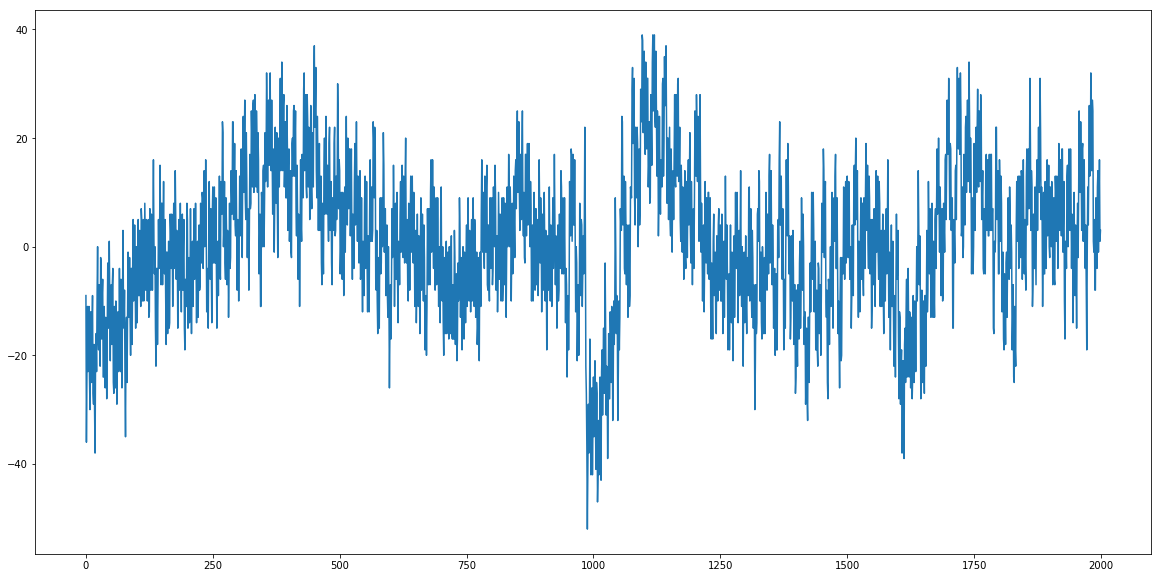

In [19]:
_ = plt.figure(figsize=(20,10))
plt.plot(record.p_signal[0:2000,0])
plt.show()

/beegfs/ga4493/projects/groupb/environments/physionet_env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


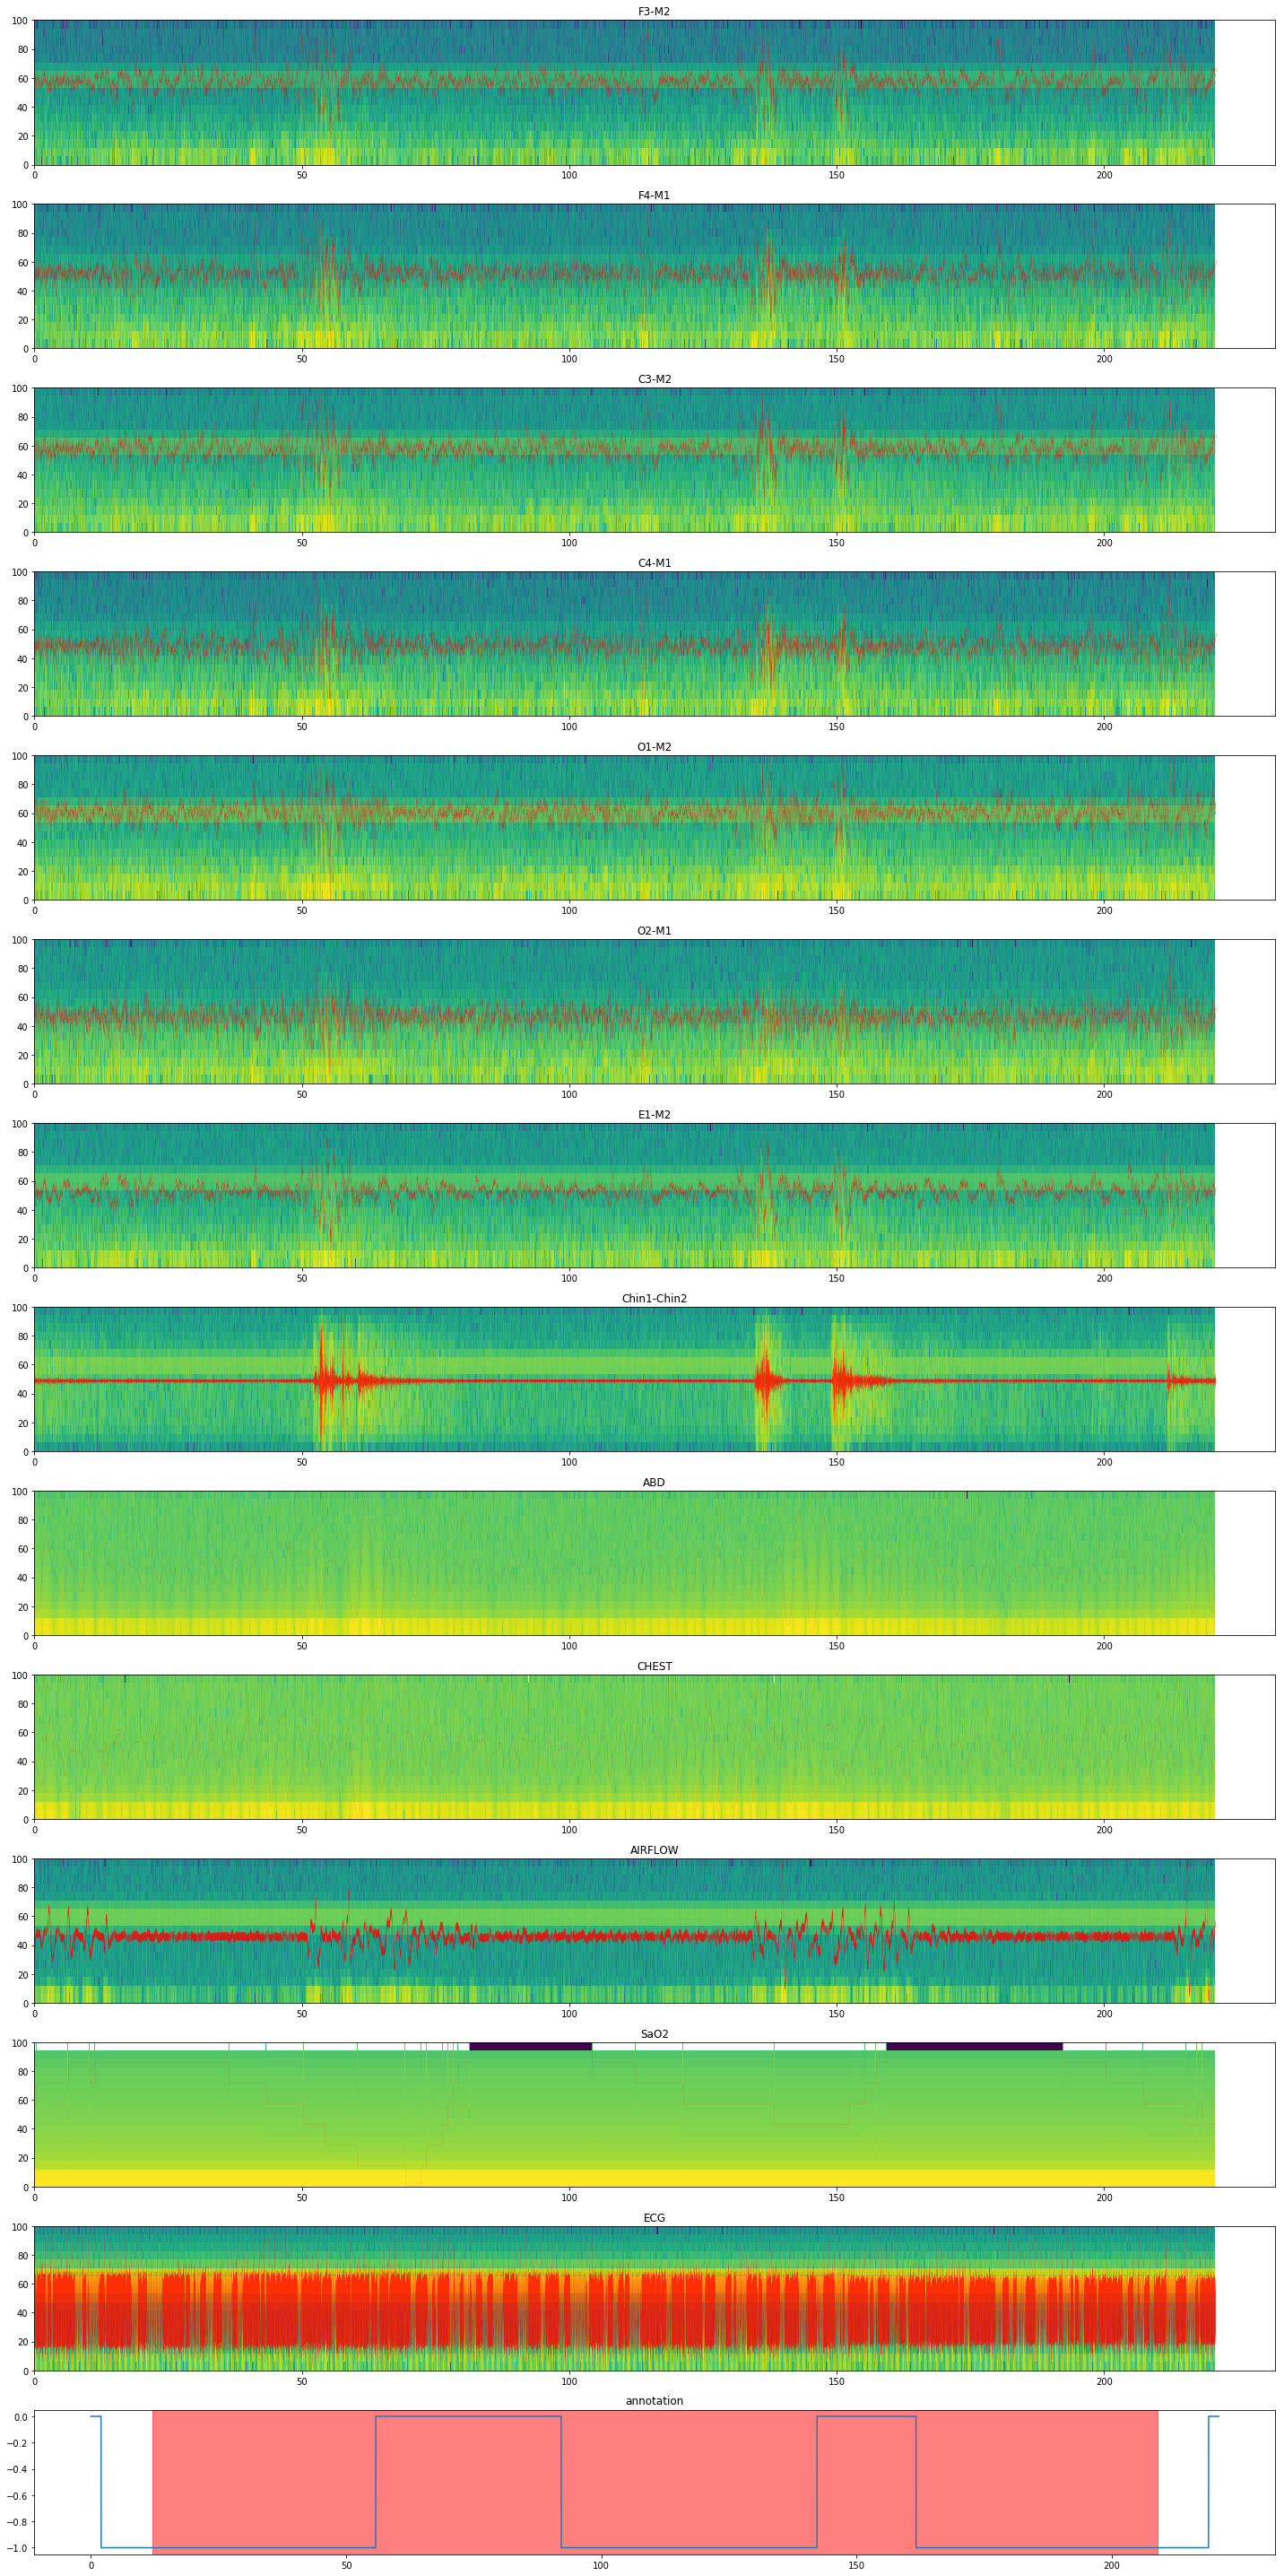

In [20]:
offset = 2400
start_idx = 2614486 - offset
end_idx = 2653873 + offset

# x_ax = np.linspace(start_idx,end_idx, end_idx-start_idx)
x_ax = np.linspace(0, (end_idx-start_idx)/200, end_idx-start_idx)

f, axarr = plt.subplots(14, figsize=(20, 40))
for i in range(13):
    sig = record.p_signal[start_idx:end_idx,i]
    _ = axarr[i].specgram(record.p_signal[start_idx:end_idx,i], NFFT=32, Fs=200, noverlap=0)
    _ = axarr[i].plot(x_ax, (sig - sig.min())/(sig.max() - sig.min())*100, label=record.sig_name[i], alpha=0.8, 
                      c='red', lw=0.1)
    _ = axarr[i].set_title(record.sig_name[i])
#     _ = axarr[i].axvspan(start_idx + offset, end_idx - offset, color='black', alpha=0.1)
_ = axarr[13].plot(x_ax, arousals['data']['arousals'].value[start_idx:end_idx,].ravel(), label='annotation')
_ = axarr[13].set_title('annotation')
_ = axarr[13].axvspan(offset/200, (end_idx-start_idx - offset)/200, color='red', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
np.linspace(0, (end_idx-start_idx)/200, end_idx-start_idx)

array([  0.00000000e+00,   5.00011316e-03,   1.00002263e-02, ...,
         2.20925000e+02,   2.20930000e+02,   2.20935000e+02])

In [16]:
import os
import numpy as np
import pandas as pd
from pylab import find
import scipy.io
from sklearn.externals import joblib

# -----------------------------------------------------------------------------
# returns a list of the training and testing file locations for easier import
# -----------------------------------------------------------------------------
def get_files():
    header_loc, arousal_loc, signal_loc, is_training = [], [], [], []
    rootDir = '/beegfs/ga4493/projects/groupb/data/training'
    fileList = os.listdir()
    is_training.append(True)

    for fname in fileList:
        if '.hea' in fname:
            header_loc.append(dirName + '/' + fname)
        if '-arousal.mat' in fname:
            arousal_loc.append(dirName + '/' + fname)
        if 'mat' in fname and 'arousal' not in fname:
            signal_loc.append(dirName + '/' + fname)

    # combine into a data frame
    data_locations = {'header':      header_loc,
                      'arousal':     arousal_loc,
                      'signal':      signal_loc,
                      'is_training': is_training
                      }

    # Convert to a data-frame
    df = pd.DataFrame(data=data_locations)

    # Split the data frame into training and testing sets.
    tr_ind = list(find(df.is_training.values))

    training_files = df.loc[tr_ind, :]

    return training_files

In [17]:
tf = get_files()
tf

ValueError: arrays must all be same length

In [ ]:
statistics = []
ArousalStats = namedtuple('ArousalStats', ['count', 'mean', 'min', 'max'], verbose=True)
with open('../data/training/RECORDS', 'r') as r:
    for i in r.readlines():
        i = i.strip()
        tst_ann = wfdb.rdann('../data/training/' + i + i[:-1], 'arousal')
        start_idx = np.where(np.array(tst_ann.aux_note) == '(arousal_rera')
        end_idx = np.where(np.array(tst_ann.aux_note) == 'arousal_rera)')
        s_v = tst_ann.sample[start_idx]
        e_v = tst_ann.sample[end_idx]

        dist = np.subtract(e_v, s_v)
        
        statistics.append(
            ArousalStats(
                len(dist),
                np.mean(dist) if len(dist) > 0 else 0,
                np.min(dist) if len(dist) > 0 else 0,
                np.max(dist) if len(dist) > 0 else 0
            )
        )


In [7]:
n_statistics = np.array(statistics)

In [30]:
max_list = sorted(statistics, key=lambda x: x.max, reverse=True)[:10]
pprint.pprint(max_list)

[ArousalStats(count=1, mean=24960.0, min=24960, max=24960),
 ArousalStats(count=32, mean=7356.75, min=2920, max=20260),
 ArousalStats(count=18, mean=6528.833333333333, min=3640, max=18660),
 ArousalStats(count=65, mean=6935.3230769230768, min=3279, max=18500),
 ArousalStats(count=81, mean=5568.5308641975307, min=3420, max=16780),
 ArousalStats(count=52, mean=5845.75, min=2500, max=16740),
 ArousalStats(count=11, mean=6747.272727272727, min=3700, max=16280),
 ArousalStats(count=47, mean=7007.5957446808507, min=2640, max=15880),
 ArousalStats(count=41, mean=5203.8292682926831, min=2700, max=15419),
 ArousalStats(count=52, mean=5541.0, min=2080, max=15019)]


In [ ]:
min_list = sorted(filter(lambda x: x.count > 0, statistics), key=lambda x: x.min)
pprint.pprint(min_list)

In [44]:
mean = reduce(lambda x, y: x + y.mean, statistics, 0.0) / len(statistics)
print(mean)

3739.92929291


In [28]:
for i in statistics:
    pprint.pprint(i.mean)

4848.7777777777774
3459.0
3779.0
3106.5833333333335
3560.3846153846152
4703.333333333333
4446.2799999999997
3407.0769230769229
3297.0
3651.802197802198
4537.0484581497794
3718.090909090909
3703.5454545454545
3151.8481012658226
4540.9666666666662
3884.5384615384614
4101.652173913043
4487.5
0
2840.0
4315.2352941176468
3386.9846153846156
4545.7090909090912
6190.6923076923076
2779.8571428571427
4829.8208955223881
3606.3636363636365
3033.0434782608695
4159.9473684210525
4085.4883720930234
3875.8918918918921
3884.7199999999998
2995.102564102564
3668.9214285714284
4050.4615384615386
4539.2075471698117
4181.2038216560513
3790.273076923077
2988.5840336134452
6217.787878787879
0
3463.7619047619046
4380.4923076923078
3646.4155844155844
3620.0
3900.1944444444443
4082.0810810810813
3325.969696969697
4312.9767441860467
3379.5306122448978
3414.9166666666665
4453.0517241379312
2541.25
4813.6896551724139
4391.8666666666668
5281.688172043011
4182.854166666667
3004.1162790697676
4135.909090909091
3691.28